# Part 2

## Question 1 

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

(0.0, 256.0)

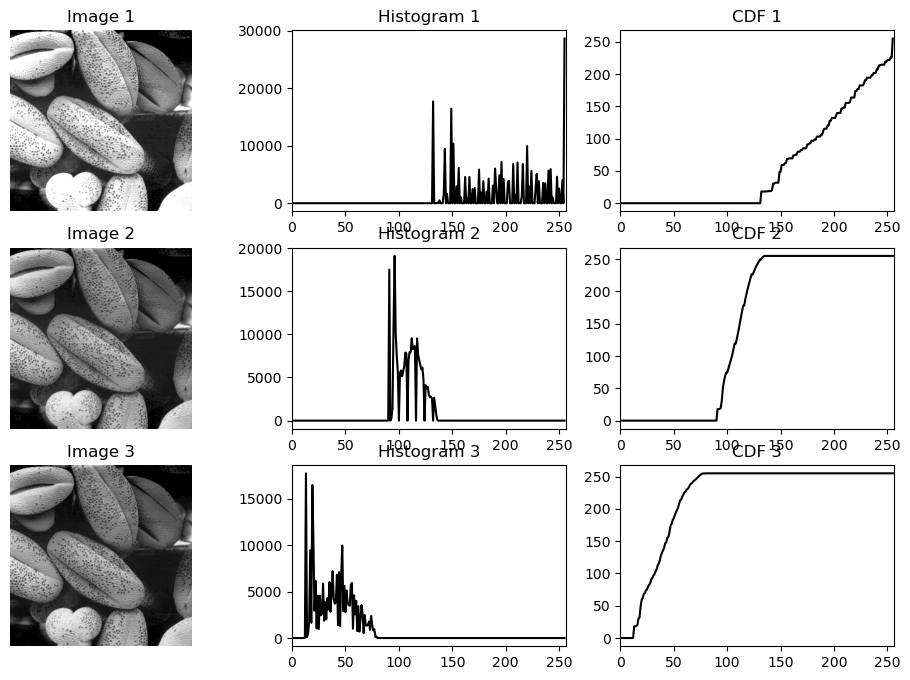

In [14]:
# Load image (grayscale)
g1 = cv2.imread("grayImg.png", cv2.IMREAD_GRAYSCALE)
g2 = cv2.imread("greyImage2.png", cv2.IMREAD_GRAYSCALE)
g3 = cv2.imread("greyImage3.png", cv2.IMREAD_GRAYSCALE)
# Compute histogram with OpenCV
hist1, bins = np.histogram(g1.flatten(), bins=256, range=[0, 256])
hist2, bins = np.histogram(g2.flatten(), bins=256, range=[0, 256])
hist3, bins = np.histogram(g3.flatten(), bins=256, range=[0, 256])

pdf1 = hist1 / hist1.sum()
pdf2 = hist2 / hist2.sum()
pdf3 = hist3 / hist3.sum()

cdf1 = np.cumsum(pdf1)
cdf2 = np.cumsum(pdf2)
cdf3 = np.cumsum(pdf3)

cdf1_normalized = cdf1 * 255 / cdf1[-1]
cdf2_normalized = cdf2 * 255 / cdf2[-1]
cdf3_normalized = cdf3 * 255 / cdf3[-1]

equalized_img = cdf1_normalized[g1.astype('uint8')]
equalized_img2 = cdf2_normalized[g2.astype('uint8')]
equalized_img3 = cdf3_normalized[g3.astype('uint8')]

# Plot histograms
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.imshow(g1, cmap='gray')
plt.title('Image 1')
plt.axis('off')
plt.subplot(3, 3, 2)
plt.plot(bins[:-1], hist1, color='black')
plt.title('Histogram 1')
plt.xlim([0, 256])
plt.subplot(3, 3, 3)
plt.plot(bins[:-1], cdf1_normalized, color='black')
plt.title('CDF 1')
plt.xlim([0, 256])


plt.subplot(3, 3, 4)
plt.imshow(g2, cmap='gray')
plt.title('Image 2')
plt.axis('off')
plt.subplot(3, 3, 5)    
plt.plot(bins[:-1], hist2, color='black')
plt.title('Histogram 2')
plt.xlim([0, 256])
plt.subplot(3, 3, 6)
plt.plot(bins[:-1], cdf2_normalized, color='black')
plt.title('CDF 2')
plt.xlim([0, 256])


plt.subplot(3, 3, 7)
plt.imshow(g3, cmap='gray')
plt.title('Image 3')
plt.axis('off')
plt.subplot(3, 3, 8)
plt.plot(bins[:-1], hist3, color='black')
plt.title('Histogram 3')
plt.xlim([0, 256])
plt.subplot(3, 3, 9)
plt.plot(bins[:-1], cdf3_normalized, color='black')
plt.title('CDF 3')
plt.xlim([0, 256])


Text(0.5, 1.0, 'Equalized Image 3')

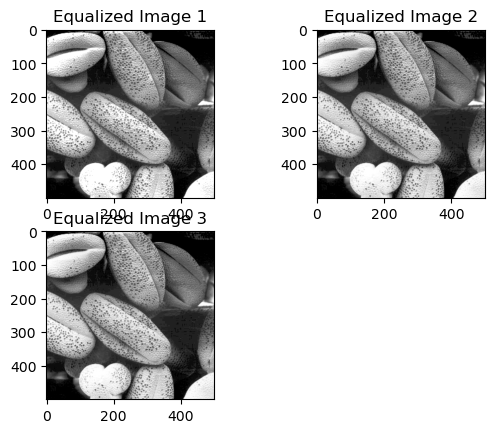

In [15]:
plt.subplot(2,2,1)
plt.imshow(equalized_img, cmap='gray')
plt.title("Equalized Image 1")

plt.subplot(2,2,2)
plt.imshow(equalized_img2, cmap='gray')
plt.title("Equalized Image 2")

plt.subplot(2,2,3)
plt.imshow(equalized_img3, cmap='gray')
plt.title("Equalized Image 3")

## Question 2

In [5]:
def equalize_color_image(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    ycrcb[:,:,0] = cv2.equalizeHist(ycrcb[:,:,0])   # equalize Y
    equalized = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
    return equalized

def plot_image_and_hist(img, title="Image + Histogram"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12,5))

    # Left: image
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")

    # Right: RGB histograms
    plt.subplot(1,2,2)
    colors = ('r','g','b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0,256])
        plt.plot(hist, color=col)
    plt.title("Color Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

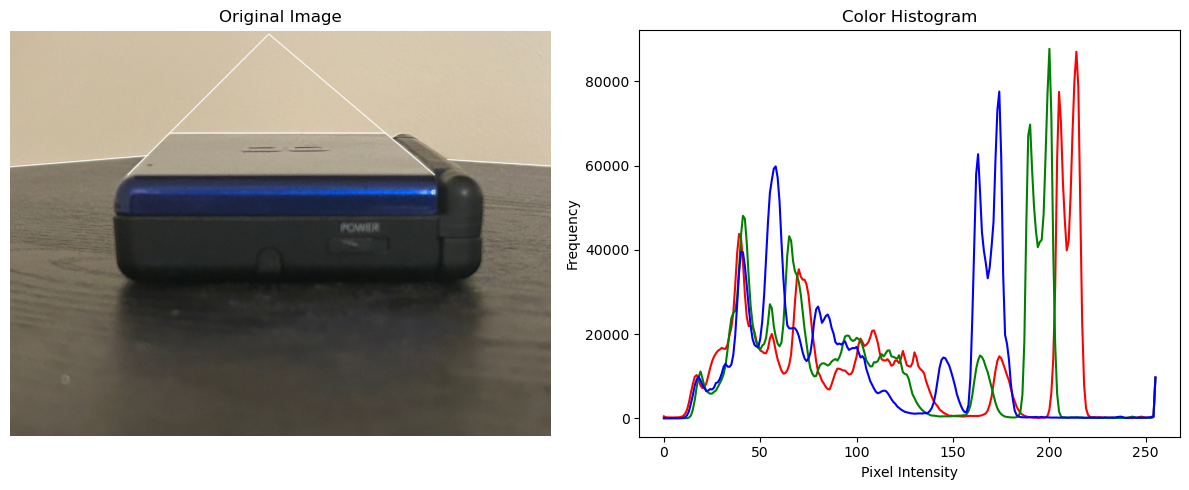

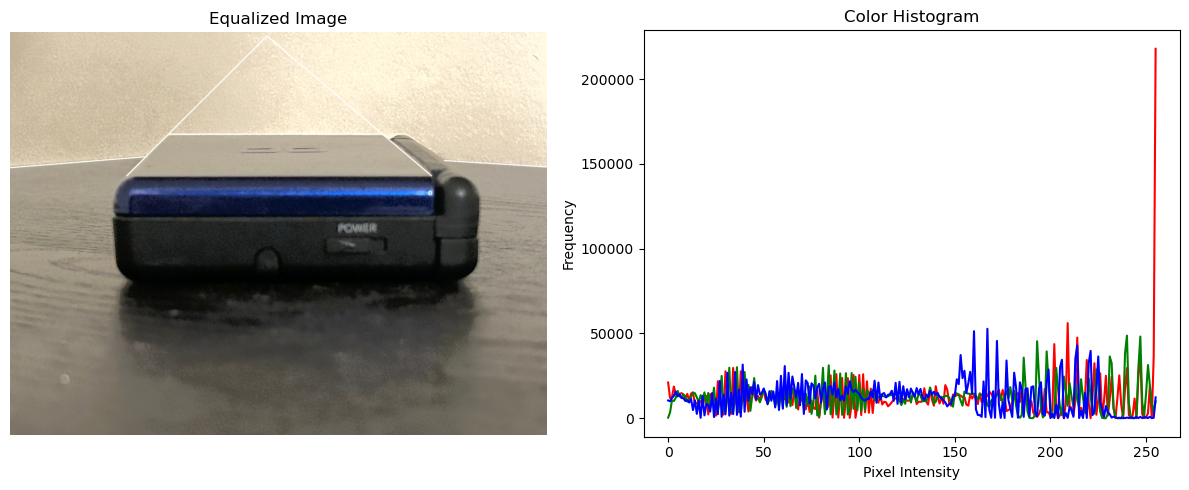

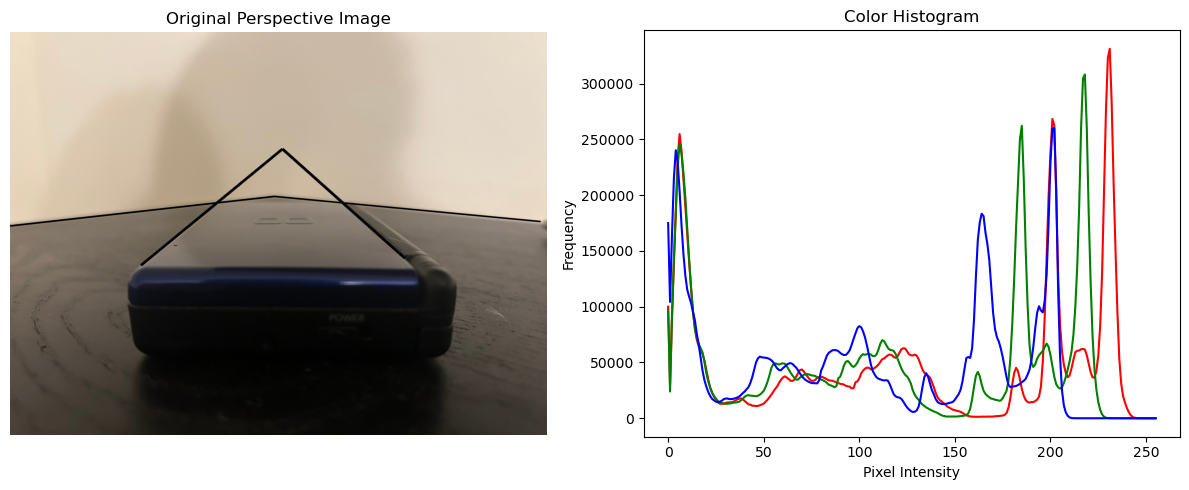

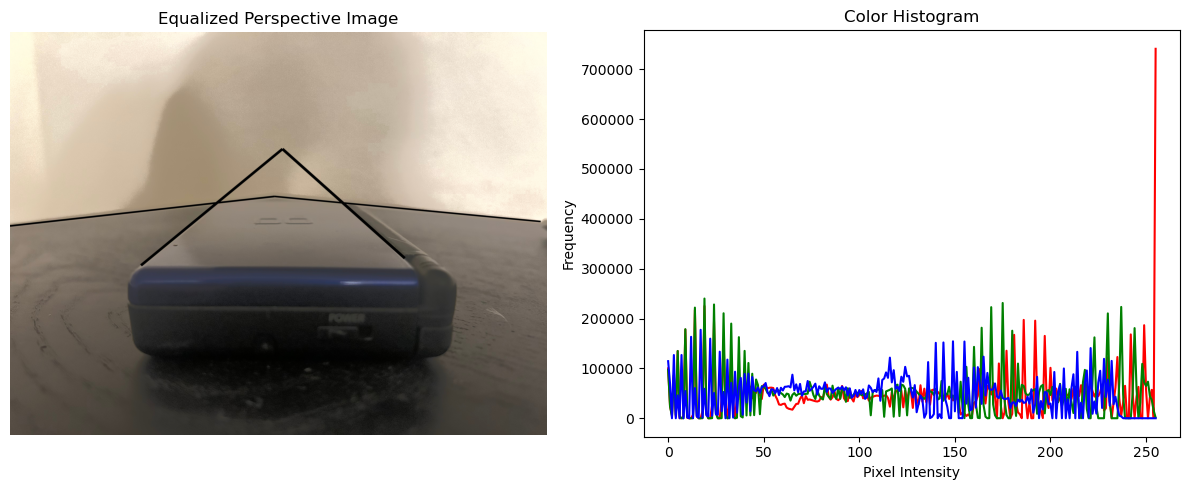

In [ ]:
img = cv2.imread("Orthogonal.png")
im2 = cv2.imread("Perspective.png")
# Equalize
eq_img, eq_img2 = equalize_color_image(img), equalize_color_image(im2)

# Plot original
plot_image_and_hist(img, title="Original Orthogonal Image")

# Plot equalized
plot_image_and_hist(eq_img, title="Equalized Orthogonal Image")

# Plot original
plot_image_and_hist(im2, title="Original Perspective Image")

# Plot equalized
plot_image_and_hist(eq_img2, title="Equalized Perspective Image")

In both of the pictures I took, the histogram equalization was relatively helpful. In the perspectove image in particular the equalization helped birghten the image and make the power button more clear. In the orthogonal image, equalization had a weird effect. It seems to just add more noise but it also  texturized the image. I think it could be beneficial but maybe not necessarily worth the trade off. I think it was very interesting to see how the graphs looked post equalization, it backs up the idea that the process adds more noise, or variation between their heights. 


In [ ]:
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size//2), size//2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)
def gaussianImplementation(img):
    gauss = gaussian_kernel(size=5, sigma=1)
    smoothed = convolve2d(img, gauss, mode='same', boundary='symm')

    dx_kernel = np.array([[-1, 0, 1]], dtype=np.float32)  # horizontal
    dy_kernel = np.array([[-1], [0], [1]], dtype=np.float32)  # vertical

    dx = convolve2d(smoothed, dx_kernel, mode='same', boundary='symm')
    dy = convolve2d(smoothed, dy_kernel, mode='same', boundary='symm')

    grad_mag = np.sqrt(dx**2 + dy**2)

    return (cv2.convertScaleAbs(dx), cv2.convertScaleAbs(dy), cv2.convertScaleAbs(grad_mag))



In [64]:
def printResults(original_img, dx, dy, mag, title="Result"):
    dx_disp = cv2.convertScaleAbs(dx)
    dy_disp = cv2.convertScaleAbs(dy)
    mag_disp = cv2.convertScaleAbs(mag)

    plt.figure(figsize=(12,4))
    plt.suptitle(title, fontsize=14)

    plt.subplot(1,4,1)
    plt.imshow(original_img, cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,4,2)
    plt.imshow(dx_disp, cmap='gray')
    plt.title("Derivative X")
    plt.axis("off")

    plt.subplot(1,4,3)
    plt.imshow(dy_disp, cmap='gray')
    plt.title("Derivative Y")
    plt.axis("off")

    plt.subplot(1,4,4)
    plt.imshow(mag_disp, cmap='gray')
    plt.title("Gradient Magnitude")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


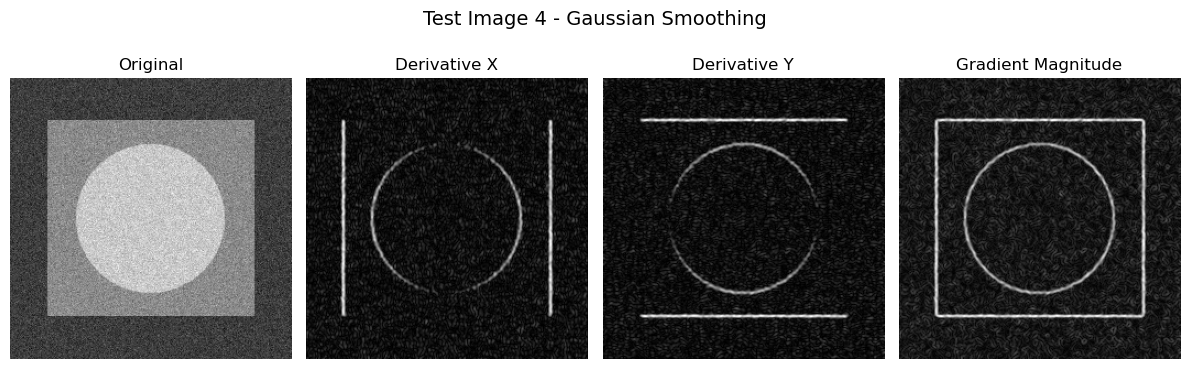

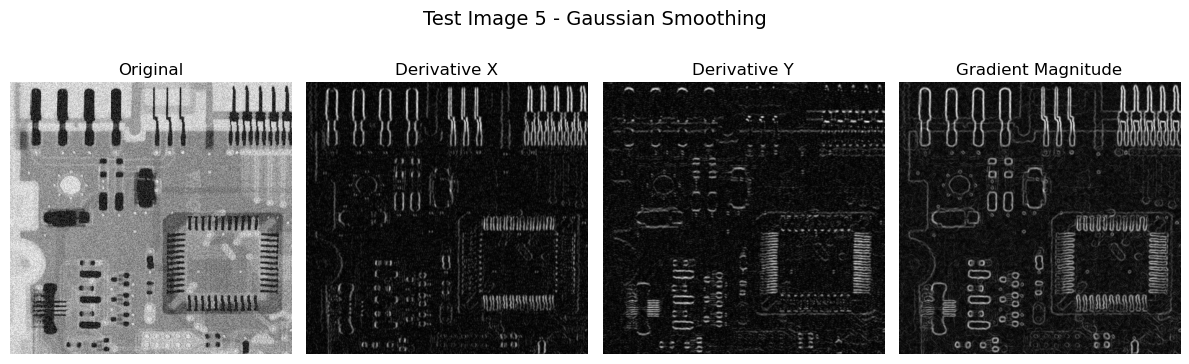

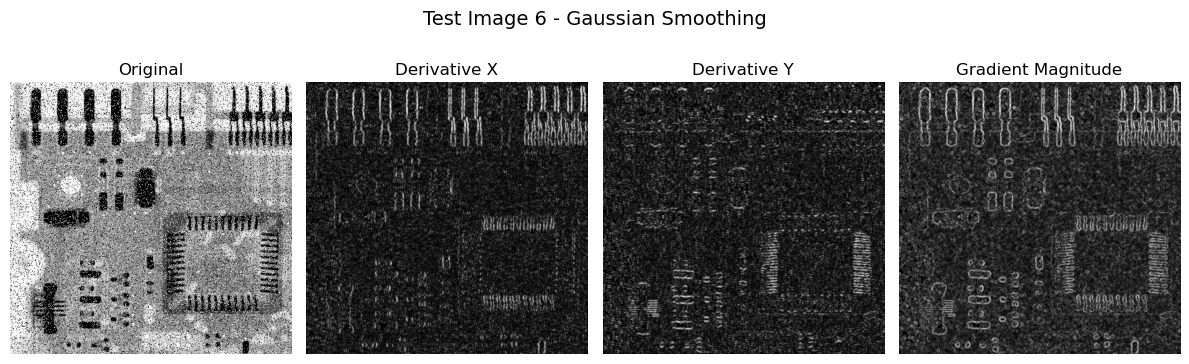

In [67]:
img4 = cv2.imread("test4.png")
img5 = cv2.imread("test5.png")
img6 = cv2.imread("test6.png")

dx1, dy1, mag1 = gaussianImplementation(cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY))
dx2, dy2, mag2 = gaussianImplementation(cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY))
dx3, dy3, mag3 = gaussianImplementation(cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY))

printResults(img4, dx1, dy1, mag1, title="Test Image 4 - Gaussian Smoothing")
printResults(img5, dx2, dy2, mag2, title="Test Image 5 - Gaussian Smoothing")
printResults(img6, dx3, dy3, mag3, title="Test Image 6 - Gaussian Smoothing")   


In [55]:
def GausBlur(img, size=5, sigma=1):
    kernel = gaussian_kernel(size, sigma)
    b = cv2.filter2D(img, -1, kernel)
    return b

def sharpen_image(img, sigma=3, alpha=1.0):
    
    blurred = GausBlur(img, size=5, sigma=1)

    high_freq = cv2.subtract(img, blurred)

    sharpened = cv2.addWeighted(img, 1.0, high_freq, alpha, 0)

    return blurred, high_freq, sharpened

def show_results(img, title, alphas=[1, 5, 10]):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, len(alphas)+1, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{title} - Original")
    plt.axis("off")


    for i, alpha in enumerate(alphas):
        blurred, high_freq, sharp = sharpen_image(img, sigma=3, alpha=alpha)

        if i == 0:
            plt.subplot(2, len(alphas)+1, 2)
            plt.imshow(blurred, cmap='gray')
            plt.title("Blurred")
            plt.axis("off")

            plt.subplot(2, len(alphas)+1, 3)
            plt.imshow(high_freq, cmap='gray')
            plt.title("High-Freq")
            plt.axis("off")

        plt.subplot(2, len(alphas)+1, i+4)
        plt.imshow(sharp, cmap='gray')
        plt.title(f"Sharpened α={alpha}")
        plt.axis("off")


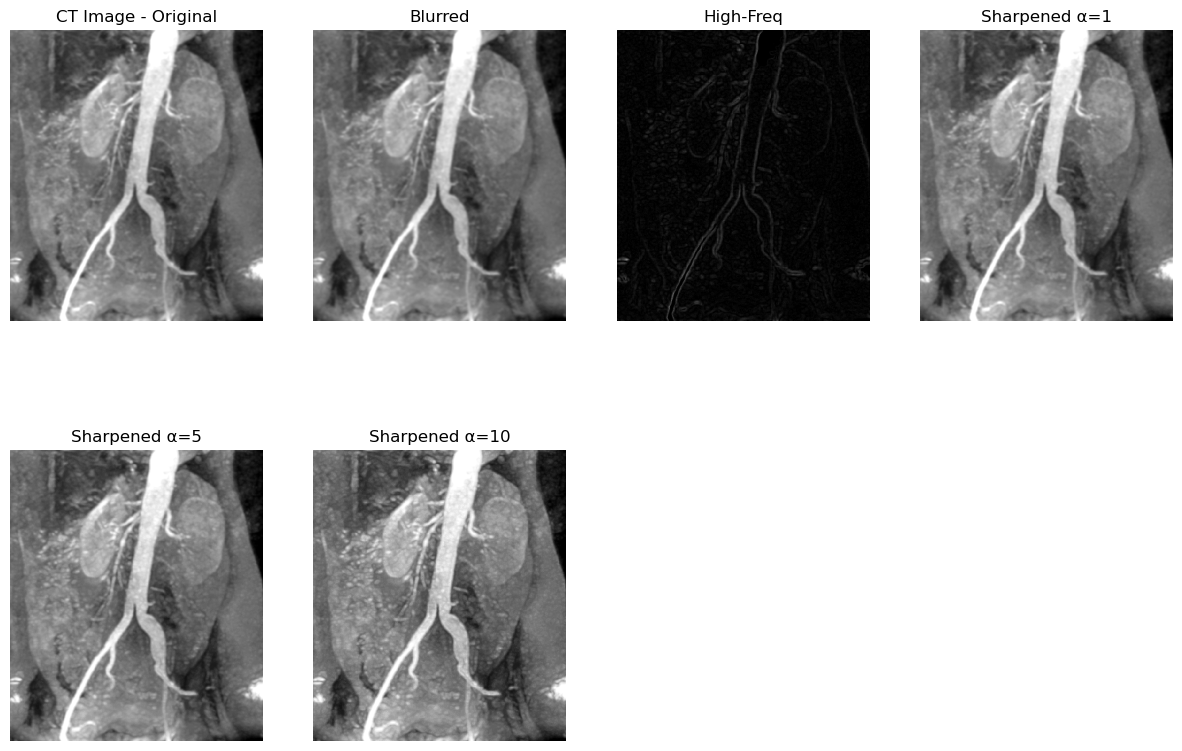

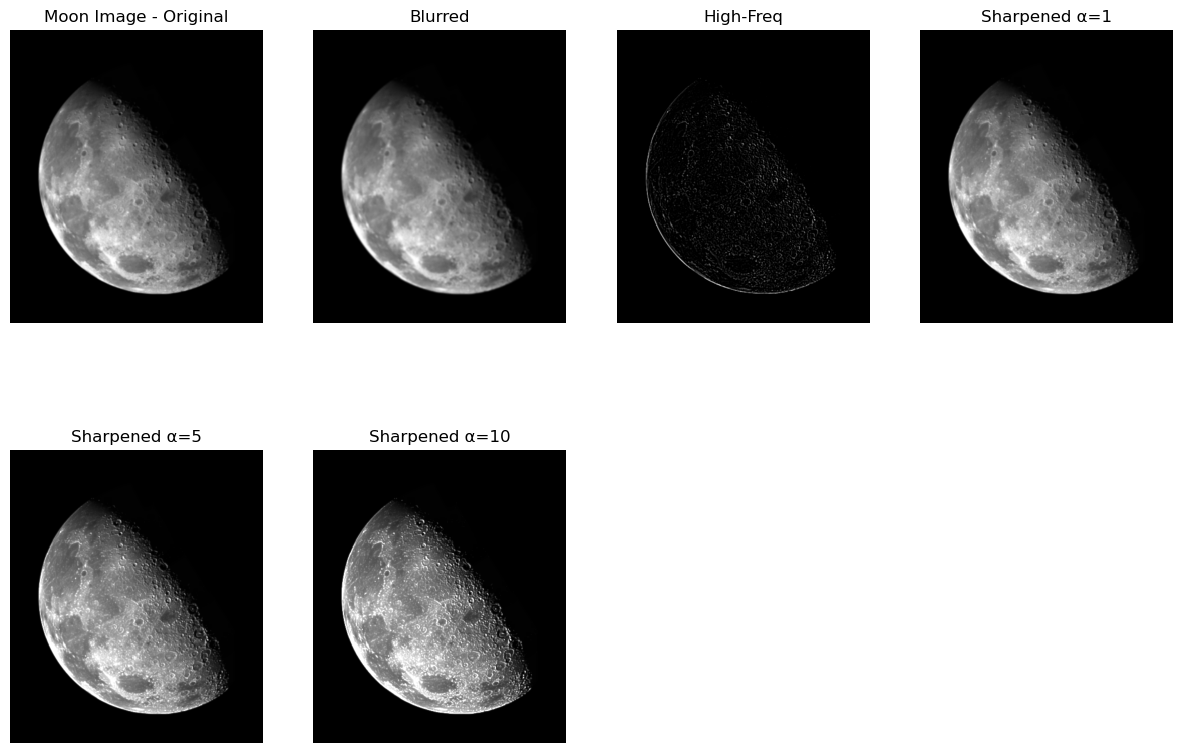

In [57]:
ct = cv2.imread("ct.png", cv2.IMREAD_GRAYSCALE)
moon = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE)

show_results(ct, "CT Image", alphas=[1, 5, 10])
show_results(moon, "Moon Image", alphas=[1, 5, 10])
